<h1>Simple Linear Regression. Minimal example</h1>

<h2>Import the relevant libraries</h2>

In [10]:
import numpy
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

<h2>Generate random input data to train on</h2>

In [11]:
observations: int = 1000

xs: numpy.ndarray = numpy.random.uniform(low=-10, high=10,size=(observations, 1))
zs: numpy.ndarray = numpy.random.uniform(low=-10, high=10,size=(observations, 1))
    
inputs: numpy.ndarray = numpy.column_stack((xs,zs))
    
print(inputs.shape)

(1000, 2)


<h2>Create the targets we will aim at</h2>

In [12]:
noise: numpy.ndarray = numpy.random.uniform(low=-1, high=1, size=(observations, 1))
    
targets: numpy.ndarray = 2*xs - 3*zs + 5 + noise
targets.shape

(1000, 1)

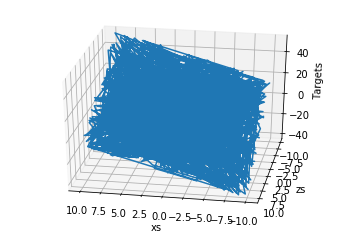

In [13]:
targets: numpy.ndarray = targets.reshape(observations)

figure: matplotlib.figure.Figure = matplotlib.pyplot.figure()
    
third_dimension_graph: matplotlib.axes._subplots = figure.add_subplot(111, projection='3d')
third_dimension_graph.plot(xs, zs, targets)
third_dimension_graph.set_xlabel('xs')
third_dimension_graph.set_ylabel('zs')
third_dimension_graph.set_zlabel('Targets')
third_dimension_graph.view_init(azim=100)

matplotlib.pyplot.show()

targets = targets.reshape(observations,1)

<h2>Initialize variables</h2>

In [14]:
init_range: float = 0.1

weights: numpy.ndarray = numpy.random.uniform(low=-init_range, high=init_range, size=(2, 1))
    
biases: numpy.ndarray = numpy.random.uniform(low=-init_range, high=init_range, size=1)

print(weights)
print(biases)

[[-0.09404065]
 [ 0.04305472]]
[-0.02585657]


<h2>Set a learning rate</h2>

In [15]:
learning_rate: float = 0.02

<h2>Train the model</h2>

In [25]:
for index in range(100):
    outputs: numpy.ndarray = numpy.dot(inputs, weights) + biases
    deltas: numpy.ndarray = outputs - targets
    
    loss: numpy.ndarray = numpy.sum(deltas ** 2) / 2 / observations
    
    print(loss)
    
    deltas_scaled: numpy.ndarray = deltas / observations
    
    weights = weights - learning_rate * numpy.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * numpy.sum(deltas_scaled)

0.1674599399122697
0.16745698113107282
0.16745413885864086
0.1674514085071753
0.1674487856695323
0.16744626611210975
0.1674438457680133
0.1674415207304915
0.16743928724663054
0.1674371417112959
0.1674350806613136
0.16743310076988002
0.16743119884119198
0.16742937180528833
0.16742761671309478
0.16742593073166348
0.16742431113960032
0.1674227553226724
0.16742126076958808
0.16741982506794387
0.16741844590032956
0.16741712104058903
0.1674158483502256
0.16741462577495095
0.167413451341369
0.16741232315379068
0.16741123939117408
0.16741019830418494
0.16740919821237293
0.16740823750145933
0.1674073146207313
0.16740642808053913
0.167405576449891
0.16740475835414406
0.16740397247278502
0.16740321753729864
0.16740249232912077
0.16740179567767055
0.16740112645846186
0.16740048359128734
0.16739986603847556
0.1673992728032157
0.16739870292794867
0.1673981554928213
0.16739762961420188
0.1673971244432539
0.16739663916456535
0.1673961729948331
0.1673957251815983
0.16739529500203212
0.16739488176176845

<h2>Print weights and biases and see if we have worked correctly</h2>

In [26]:
print(weights, biases)

[[ 1.99957447]
 [-3.0024662 ]] [5.01333266]


<h2>Plot last outputs vs targets</h2>

Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

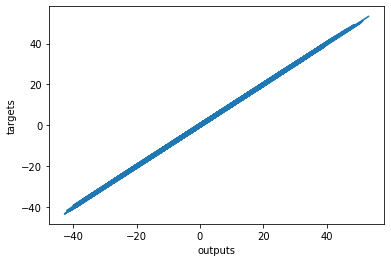

In [27]:
matplotlib.pyplot.plot(outputs, targets)
matplotlib.pyplot.xlabel('outputs')
matplotlib.pyplot.ylabel('targets')
matplotlib.pyplot.show()